In [2]:
import gym
import seagul.envs
gym.make('su_acro_drake-v0')

import pickle
import torch.utils.data

from seagul.rl.run_utils import load_model, load_workspace
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from seagul.rl.models import PPOModel, SwitchedPPOModel, SwitchedPPOModelActHold
from seagul.nn import MLP
torch.set_default_dtype(torch.double)

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#load_path = './data/mj_baseline7/acrobot73380899'
#load_path = './data/inv_pend/acrobot_116_3'

/home/sgillen/work/seagul/seagul/envs/__init__.py:81: UserWarning: Warning, registering environments for rllib failed!
  warnings.warn("Warning, registering environments for rllib failed!")
/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type i

Logging to /tmp/openai-2020-01-29-16-45-40-292067


seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils


/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'seagul.nn.MLP' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'seagul.nn.MLP' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Text(0.5, 1.0, 'Reward curve, Vanilla PPO')

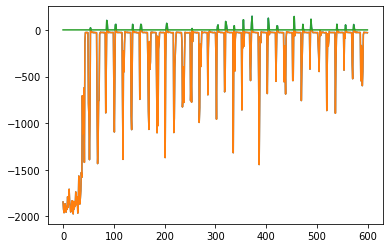

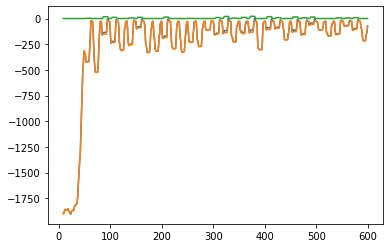

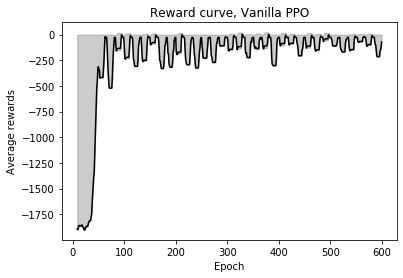

In [2]:
def control(env,q):
    k = array([[1316.85000612,  555.41763935,  570.32667002,  272.57631536]])
    goal = np.copy(env.state)
    goal[0] -= pi
    return -k.dot(goal)


#seeds = [6,7,8,9]; load_paths =  ['./data/drake_acro_switch2/500_nhb' + str(seed) for seed in seeds]
#seeds = [0,1,2,3]; load_paths =  ['./data/drake_acro_switch_final/1000_nhb_se' + str(seed) for seed in seeds]
#seeds = [6,7,8,9]; load_paths =  ['./data/drake_acro_final/seed' + str(seed) for seed in seeds]
#seeds = [0,1,2,3]; load_paths =  ['./data/acrobot6/acrobot_gamma1_' + str(seed) for seed in seeds]

seeds = [0]; load_paths =  ['./data/drake_acro_final/paper_policy' + str(seed) for seed in seeds]



#seeds = [6,7,8,9]; load_pseeds = [6,7,8,9]; load_paths =  ['./data/drake_acro_switch2/500_nhb' + str(seed) for seed in seeds]


#seeds = [0]; load_paths = ['./data/drake_acro_final/warm_seed' + str(seed) for seed in seeds]
model, env, args, ws = load_workspace(load_paths[0])
num_steps = ws['num_epochs']
#num_steps = 1000


avg_rewards = np.zeros((num_steps,))
rewards = np.zeros((num_steps,4))

for i, load_path in enumerate(load_paths):
    model, env, args, ws = load_workspace(load_path)
    
    avg_rewards += np.array((ws['avg_reward_hist']))
    rewards[:,i] = np.array((ws['avg_reward_hist']))
    #append(ws['avg_reward_hist'])
    #plt.title('reward vs epoch')
    #plt.figure()
    #plt.plot(ws['a'])
    #plt.figure()
    #plt.plot(ws['p_loss_hist'])
    #plt.figure()
    #plt.plot(ws['v_loss_hist'])
    #print(ws['num_states'])
    
avg_rewards /= len(seeds)
min_rewards = [np.min(rewards[i,:]) for i in range(num_steps)]
max_rewards = [np.max(rewards[i,:]) for i in range(num_steps)]
plt.plot(avg_rewards)
plt.plot(min_rewards)
plt.plot(max_rewards)

rewards_smoothed = pd.Series(avg_rewards).rolling(10, min_periods=10).mean()
min_smoothed =  pd.Series(min_rewards).rolling(10, min_periods=10).mean()
max_smoothed =  pd.Series(max_rewards).rolling(10, min_periods=10).mean()

plt.figure()
plt.plot(rewards_smoothed)
plt.plot(min_smoothed)
plt.plot(max_smoothed)

plt.figure()

epochs = [t for t in range(num_steps)]
plt.plot(rewards_smoothed[1:1200], color='k')
plt.fill_between(epochs[1:1200], min_smoothed[1:1200], max_smoothed[1:1200], color='k',alpha=.2 )
plt.xlabel('Epoch')
plt.ylabel('Average rewards')
plt.title('Reward curve, Vanilla PPO')

#plt.figure()
#plt.plot(np.array(ws['ep_path_tensor']))

In [2]:
from seagul.nn import DummyNet

# Acrobot
#load_path = './data/drake_acro4/seed7'
load_path = load_paths[0]
model, env, args, ws = load_workspace(load_path)

#model.policy = DummyNet(4,1,0,0,0)
model.env = env
myenv = env
#myenv.num_steps=1000
#myenv.max_t = 5


#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))
logp_hist = np.zeros((myenv.num_steps, 1))
gate_mean = np.zeros((myenv.num_steps,1))

#model.action_var = 0
#model.action_var = 1
#model.gate_var = 0

#model.action_var = 0
obs = myenv.reset()

for i in range(myenv.num_steps):
        actions, _, _, logp = model.step(obs)
        #actions = np.clip(actions, -700,700)
        gate_mean[i,:] = model.gate_fn(torch.as_tensor(obs)).detach().numpy()
        #actions = np.zeros(1)
        #actions = np.clip(actions,-10, 10)
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        try:
            logp_hist[i,:]   = logp.detach()
        except:
            logp_hist[i,:]   = logp
            
        #env.render()
        if done:
            break
            
            

NameError: name 'load_paths' is not defined

In [13]:
from seagul.nn import DummyNet

# Acrobot
#load_path = './data/drake_acro4/seed7'
load_path  = './data/drake_acro_switch2/500_nhb7'

#load_path = load_paths[0]
model, env, args, ws = load_workspace(load_path)

#model.policy = DummyNet(4,1, 0,0,0)
#model.policy = torch.load('./policy_warm_final')
model.env = env
myenv = env
#myenv.num_steps=1000
#myenv.max_t = 5


#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))
logp_hist = np.zeros((myenv.num_steps, 1))
gate_mean = np.zeros((myenv.num_steps,1))

#model.action_var = 0
#model.action_var = 1
#model.gate_var = 0

#model.action_var = 0
obs = myenv.reset()

for i in range(myenv.num_steps):
        actions, _, _, logp = model.step(obs)
        #actions = np.clip(actions, -700,700)
        #gate_mean[i,:] = model.gate_fn(torch.as_tensor(obs)).detach().numpy()
        #actions = np.zeros(1)
        #actions = np.clip(actions,-10, 10)
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        try:
            logp_hist[i,:]   = logp.detach()
        except:
            logp_hist[i,:]   = logp
            
        #env.render()
        if done:
            break
            
            

seagul.rl.run_utils
seagul.rl.run_utils


499
[789.01851316]


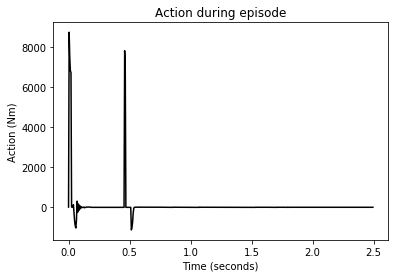

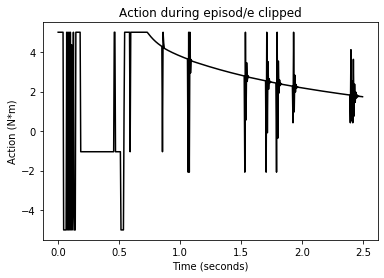

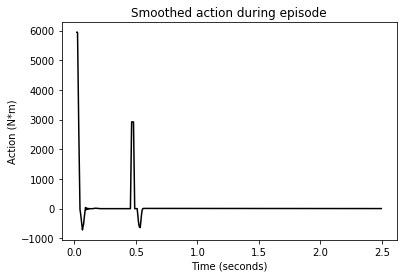

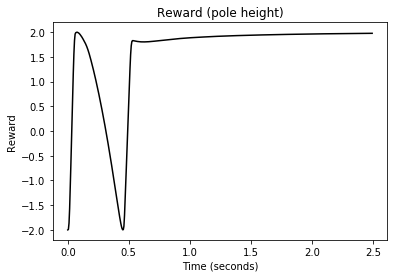

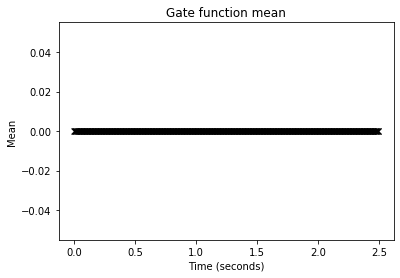

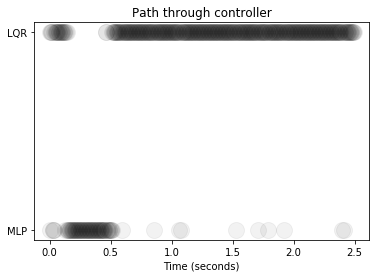

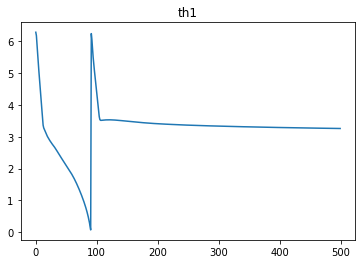

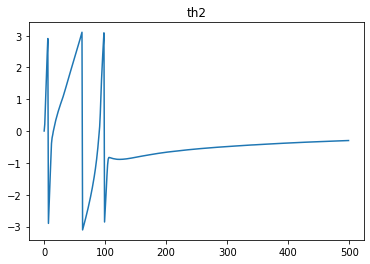

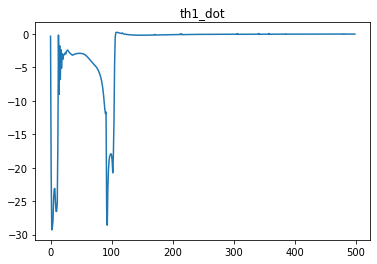

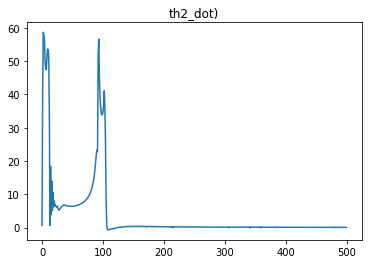

In [14]:
t_end = int(env.num_steps)

gate_hist = [1 if p == 0 else 0 for p in logp_hist]
t = [.005*i for i in range(myenv.num_steps)]
plt.plot(t[:t_end], action_hist[:t_end], color='k')
plt.title('Action during episode')
plt.xlabel('Time (seconds)')
plt.ylabel('Action (Nm)')

plt.figure()
plt.plot(t, np.clip(action_hist, -5,5), color='k')
plt.title('Action during episod/e clipped')
plt.xlabel('Time (seconds)')
plt.ylabel('Action (N*m)')

plt.figure()
actions_smoothed = pd.Series(action_hist.squeeze()).rolling(5, min_periods=5).mean()
plt.plot(t, actions_smoothed, color='k')
plt.title('Smoothed action during episode')
plt.xlabel('Time (seconds)')
plt.ylabel('Action (N*m)')


plt.figure()
plt.plot(t[:t_end], reward_hist[:t_end], color='k')
plt.title('Reward (pole height)')
plt.xlabel('Time (seconds)')
plt.ylabel('Reward')


plt.figure()
plt.plot(t[:t_end], gate_mean[:t_end] ,'x', color='k')
plt.title('Gate function mean')
#plt.yticks([0,1],['MLP', 'LQR'])
plt.xlabel('Time (seconds)')
plt.ylabel('Mean')


plt.figure()
plt.plot(t[:t_end], gate_hist[:t_end], 'o', color='k', alpha=.05,markersize=16)
plt.title('Path through controller')
plt.yticks([0,1],['MLP', 'LQR'])
plt.xlabel('Time (seconds)')

plt.figure()
plt.plot(state_hist[:,0])
plt.title("th1")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("th2")

plt.figure()
plt.plot(state_hist[:,2])
plt.title("th1_dot")

plt.figure()
plt.plot(state_hist[:,3])
plt.title("th2_dot)")

print(i)
print(sum(reward_hist))

seagul.rl.run_utils
seagul.rl.run_utils


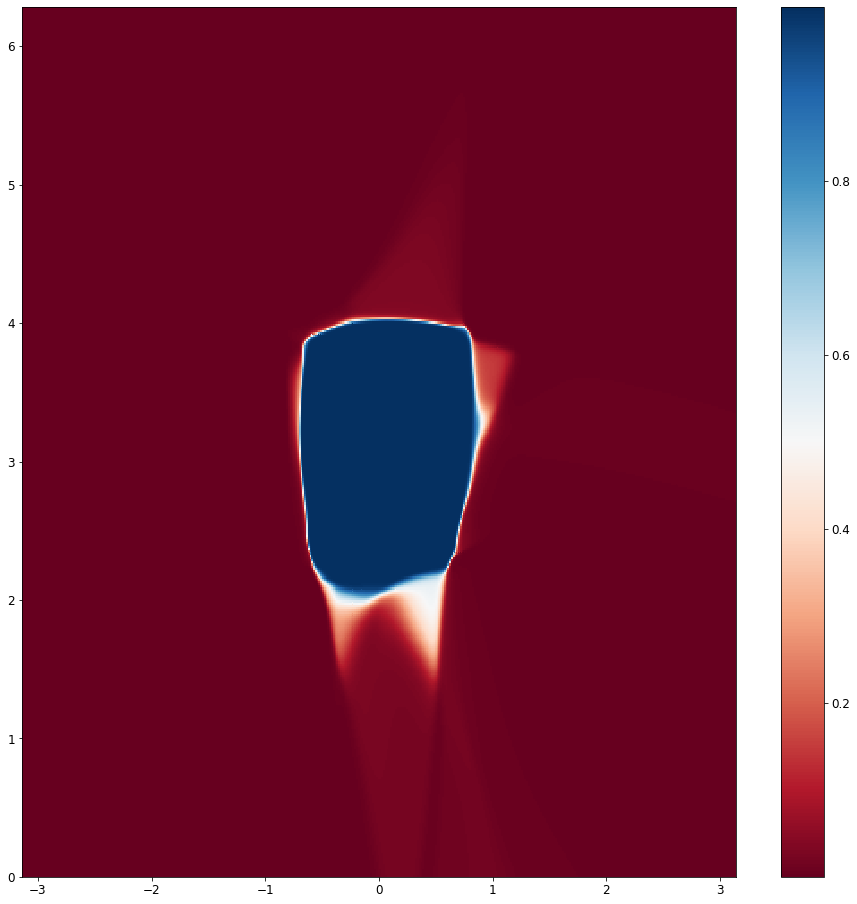

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos


#load_path = './data/drake_acro_switch2/500_nhb8'
#load_path = load_paths[0]
#load_path = torch.load()
model, env, args, ws = load_workspace(load_path)
#model, env, = load_model(load_path)

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

model.gate_fn = torch.load('gate_fn_dr')
model.policy = torch.load('warm_policy_dr')

n_thdot = 1
n_th = 400
fig, ax = plt.subplots(n_thdot,n_thdot, figsize=(16,16))

th1_vals = np.linspace(0,2*pi,n_th)
th2_vals = np.linspace(-pi,pi,n_th)

th1dot_vals = np.linspace(-10,10,n_thdot)
th2dot_vals = np.linspace(-30,30,n_thdot)

for th1i, th1dot in enumerate(th1dot_vals):
    for th2i, th2dot in enumerate(th2dot_vals):
       
        means = np.zeros((n_th,n_th))

        for i,th1 in enumerate(th1_vals):
            for j,th2 in enumerate(th2_vals):
                #obs = torch.tensor([cos(th1), sin(th1), cos(th2), sin(th2), th1dot,th2dot])
                obs = torch.tensor([th1, th2, th1dot, th2dot])
                means[i,j] = model.gate_fn(obs)



        # generate 2 2d grids for the x & y bounds
        y, x = np.meshgrid(th1_vals, th2_vals)
        z = means

        # x and y are bounds, so z should be the value *inside* those bounds.
        # Therefore, remove the last value from the z array.
        z = z[:-1, :-1]
        z_min, z_max = z.min(), z.max()


        c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
        #ax.set_title('pcolormesh')
        # set the limits of the plot to the limits of the data
        ax.axis([x.min(), x.max(), y.min(), y.max()])

        #plt.show()
        
#for i,a in enumerate(ax):
    #for j,b in enumerate(a):
        #b.set(ylabel = "theta 1", xlabel="theta 2", title="th2d=" + str(th2dot_vals[j]) +  "  th1d=" + str(th1dot_vals[i]) )
        #b.label_outer()
fig.colorbar(c, ax=ax)



Text(0.5, 1.0, 'Pretrained gate network output for $\\dot \\theta_{1} = \\dot \\theta_{2} = 0$')

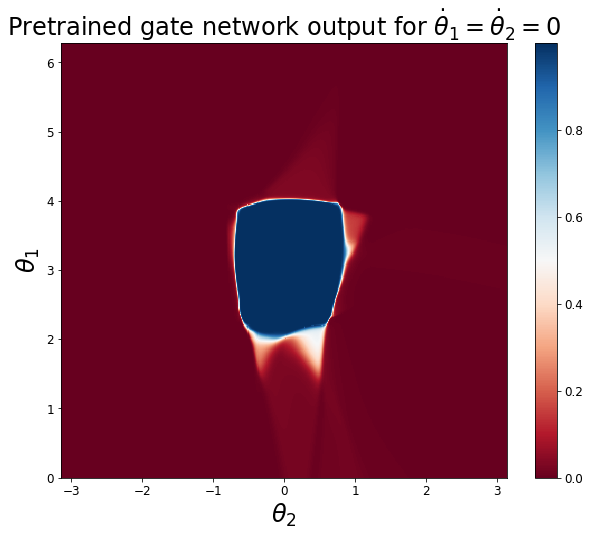

In [18]:
SMALL_SIZE = 12
MEDIUM_SIZE = 24
BIGGER_SIZE = 24
import matplotlib

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#matplotlib.rc('font', **font)

fig, ax = plt.subplots(n_thdot,n_thdot, figsize=(10,8))


y, x = np.meshgrid(th1_vals, th2_vals)
z = means

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = 0, np.abs(z).max()


c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
#ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)
    
plt.xlabel(r'$\theta_{2}$')
plt.ylabel(r'$\theta_{1}$')
plt.title(r'Pretrained gate network output for $\dot \theta_{1} = \dot \theta_{2} = 0$')

seagul.rl.run_utils
seagul.rl.run_utils


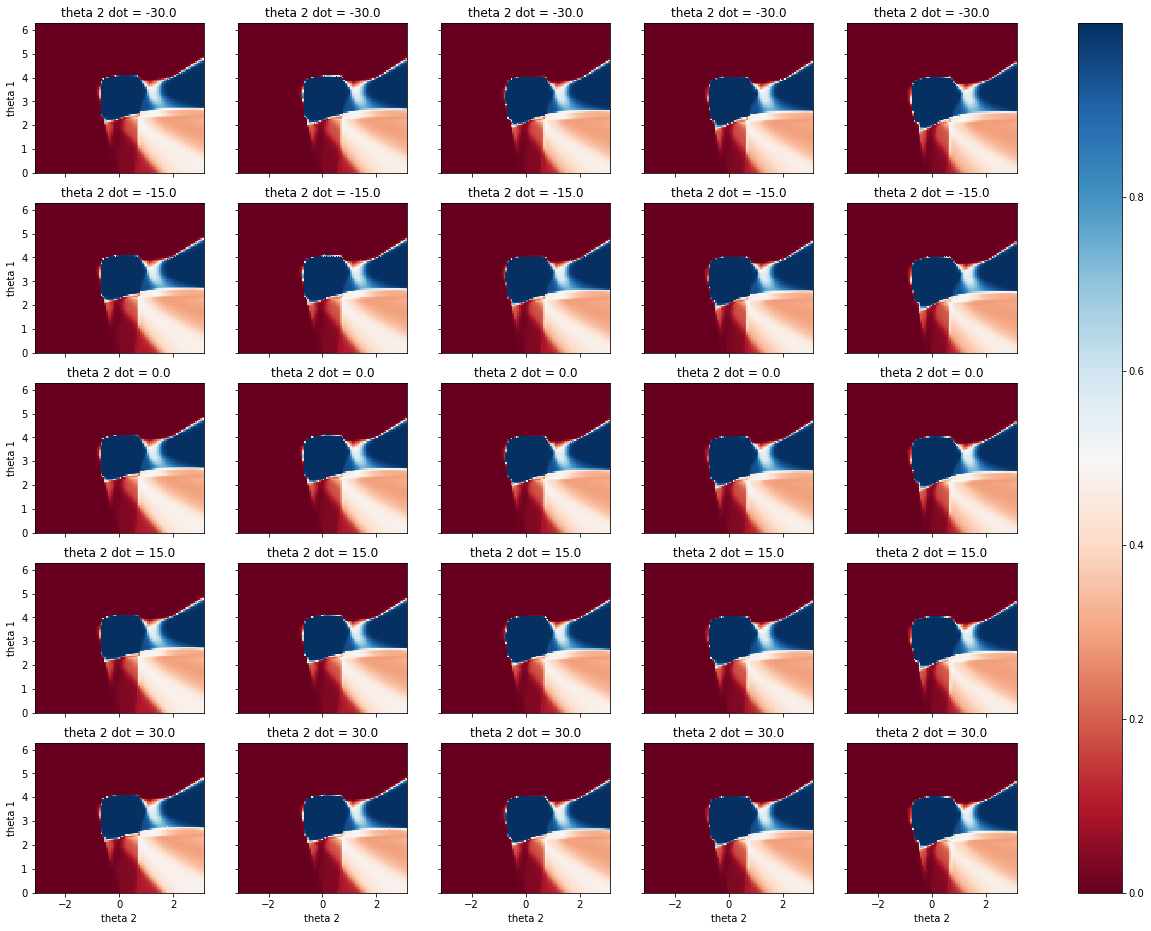

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos



load_path = './data/drake_acro4/5'
model, env, args, ws = load_workspace(load_path)


#model.gate_fn = torch.load("./gate_fn_drv")

n_thdot = 5
n_th = 100
fig, ax = plt.subplots(n_thdot,n_thdot, figsize=(22,16))

th1_vals = np.linspace(0,2*pi,n_th)
th2_vals = np.linspace(-pi,pi,n_th)

th1dot_vals = np.linspace(-10,10,n_thdot)
th2dot_vals = np.linspace(-30,30,n_thdot)

for th1i, th1dot in enumerate(th1dot_vals):
    for th2i, th2dot in enumerate(th2dot_vals):
       
        means = np.zeros((n_th,n_th))

        for i,th1 in enumerate(th1_vals):
            for j,th2 in enumerate(th2_vals):
                #obs = torch.tensor([cos(th1), sin(th1), cos(th2), sin(th2), th1dot,th2dot])
                obs = torch.tensor([th1, th2, th1dot, th2dot])
                means[i,j] = model.gate_fn(obs)



        # generate 2 2d grids for the x & y bounds
        y, x = np.meshgrid(th1_vals, th2_vals)
        z = means

        # x and y are bounds, so z should be the value *inside* those bounds.
        # Therefore, remove the last value from the z array.
        z = z[:-1, :-1]
        z_min, z_max = 0, np.abs(z).max()


        c = ax[th1i, th2i].pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
        #ax.set_title('pcolormesh')
        # set the limits of the plot to the limits of the data
        ax[th1i, th2i].axis([x.min(), x.max(), y.min(), y.max()])

        #plt.show()
        
for i,a in enumerate(ax):
    for j,b in enumerate(a):
        b.set(ylabel = "theta 1", xlabel="theta 2", title="theta 2 dot = " + str(th2dot_vals[i]))
        b.label_outer()
        
fig.colorbar(c, ax=ax)


              

In [2]:
# Cartpole

myenv = env
myenv.num_steps=1500 

sss

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))

obs = env.reset()

for i in range(myenv.num_steps):
        actions, _, _, _ = model.step(obs)
        #actions = np.zeros(1)
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break

plt.plot(action_hist)
plt.figure()
plt.plot(reward_hist)

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("x")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("xdot ")


print(i)
print(sum(reward_hist))

NameError: name 'env' is not defined

In [3]:
load_path  = './data/drake_acro_switch2/500_nhb7'
model, env, args, ws = load_workspace(load_path)

model.env = env
myenv = env


num_trials = 10

action_hist = np.zeros((num_trials, myenv.num_steps,1))
state_hist = np.zeros((num_trials, myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((num_trials, myenv.num_steps, 1))
logp_hist = np.zeros((num_trials, myenv.num_steps, 1))
gate_mean = np.zeros((num_trials, myenv.num_steps,1))
init_state_hist = np.zeros((num_trials,myenv.observation_space.shape[0]))

for t in range(num_trials):
    init_state = np.random.random(4)
    centers = np.array([.5,0,.5,.5])
    weights = np.array([2*pi,2*pi,15,30])
    init_state = (init_state-centers)*weights
    
    init_state_hist[t] = init_state
    obs = myenv.reset(init_vec = init_state)
    for i in range(myenv.num_steps):
            actions, _, _, logp = model.step(obs)
            obs, reward, done, _ = env.step(actions)        
            action_hist[t,i,:] = np.copy(actions)
            state_hist[t,i,:] = np.copy(obs)
            reward_hist[t,i,:] = np.copy(reward)
            try:
                logp_hist[t,i,:]   = logp.detach()
            except:
                logp_hist[t,i,:]   = logp
            
            #env.render()
            if done:
                break
            
            

seagul.rl.run_utils
seagul.rl.run_utils


/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'seagul.nn.MLP' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'seagul.nn.CategoricalMLP' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/sgillen/miniconda3/envs/drake/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'seagul.nn.MLP' has changed. you can retrieve the original source code by accessing the objec

AttributeError: 'MLP' object has no attribute 'output_activation'

In [1]:
print(init_state_hist)
for t in range(num_trials):
    plt.plot(np.cos(state_hist[t, : 0])  + np.cos(state_hist[t,:,0] + state_hist[t,:,1]), np.sin(state_hist[t,:,0]) + np.sin(state_hist[t,:,0] + state_hist[t,:,1]))
    plt.figure()

NameError: name 'init_state_hist' is not defined